# FLIGHT PRICE PREDICTION

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing Dataset

1. Since data is in form of excel file we have touse pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden information such as null values in a colum or a row
3. Check whether any null values are there or not. if it is presesnt then following can be done,
   A. Imputing data using Imputation in sklearn 
   B. Filling NaN values with mean, median and mode using fillna() method
4. Describe data ----> which can give statistical analysis.

In [327]:
flight_data = pd.read_excel(r"Data_Train.xlsx")

In [328]:
pd.set_option('display.max_columns',None)

In [329]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [330]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [331]:
flight_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
35h 20m      1
3h 25m       1
29h 10m      1
41h 20m      1
19h 50m      1
Name: Duration, Length: 368, dtype: int64

In [332]:
flight_data.dropna(inplace = True)

In [333]:
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

From Description we can see the Date_of_Journey is a object data type,
Therefore, we have to convert the datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date


In [334]:
flight_data["Journey_day"] = pd.to_datetime(flight_data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [336]:
flight_data["Journey_month"] = pd.to_datetime(flight_data.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [220]:
#flight_data["Journey_year"] = pd.to_datetime(flight_data.Date_of_Journey, format = "%d/%m/%Y").dt.year

In [337]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [338]:
#We Have converted Date_of_journey column into integers, now we can drop as it is od no use

flight_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [339]:
# Departure time is when plane leaves the gate.
#Similar to Date_of_journey we can extract values from Dep_time

#Extracting Hours
flight_data["Dep_hour"] = pd.to_datetime(flight_data.Dep_Time).dt.hour
#Extracting minute
flight_data["Dep_min"] = pd.to_datetime(flight_data.Dep_Time).dt.minute

#Now we can drop Dep_Time as it is no use
flight_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [340]:
flight_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [341]:
#Arrival time is when the plane pulls up to the gate


#Extracting Hours
flight_data["Arrival_hour"] = pd.to_datetime(flight_data.Arrival_Time).dt.hour
#Extracting minute
flight_data["Arrival_min"] = pd.to_datetime(flight_data.Arrival_Time).dt.minute

#Now we can drop Arrival_Timee as it is no use
flight_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [342]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [343]:
#Time taken by plane to reach the destination is called duration
#It is the difference between depature time and Arrival Time


#Assigning and Converting Duration column into list
duration = list(flight_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"     #Add 0 Minute
        else:
            duration[i] = "0h "  + duration[i]             #Add 0 Hour
            
        
Duration_hours = []
Duration_mins =  [] 
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0]))
    Duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [344]:
#Adding duration_hours and duration_mins list to fliht_data dataframe

flight_data["Duration_hours"] = Duration_hours
flight_data["Duration_mins"] = Duration_mins


In [345]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [346]:
flight_data.drop(["Duration"],axis = 1, inplace = True)

In [347]:
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

In [348]:
flight_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [349]:
flight_data1 =  flight_data[(flight_data.Airline == 'Jet Airways' )]
flight_data2 =  flight_data[(flight_data.Airline == 'Jet Airways Business' )]
flight_data = flight_data.drop(flight_data1.index, axis = 0)
flight_data = flight_data.drop(flight_data2.index, axis = 0)


In [350]:
flight_data["Airline"].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

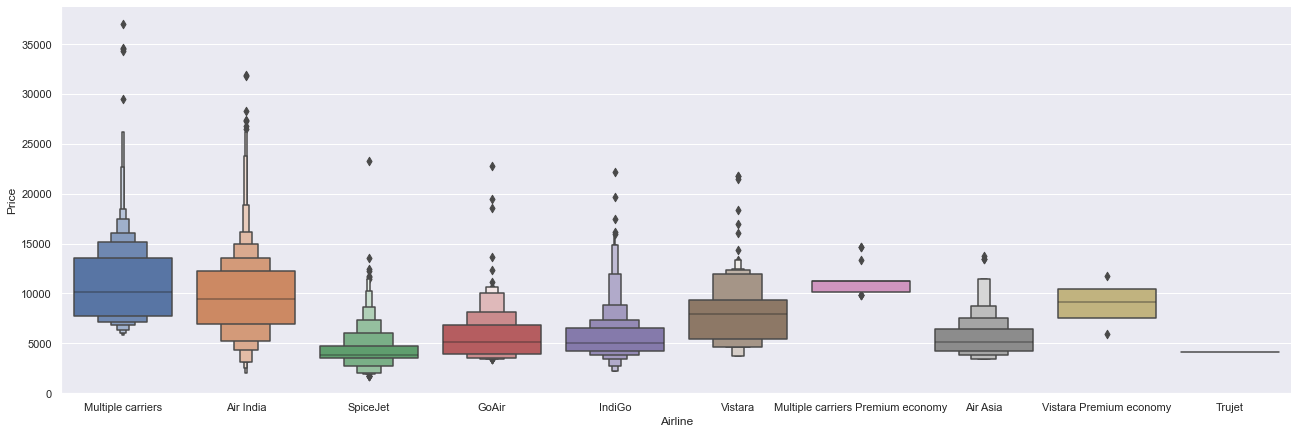

In [351]:
#From Graph we can see that Indigo Business have the highest Price.
#Apart from the first Airline almost all are having similar median

#Airline Vs Price

sns.catplot(y = "Price", x = "Airline", data = flight_data.sort_values("Price", ascending = False),kind = "boxen", height = 6, aspect = 3 )
plt.show()

In [352]:
#Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = flight_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0


In [353]:
flight_data["Source"].value_counts()

Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

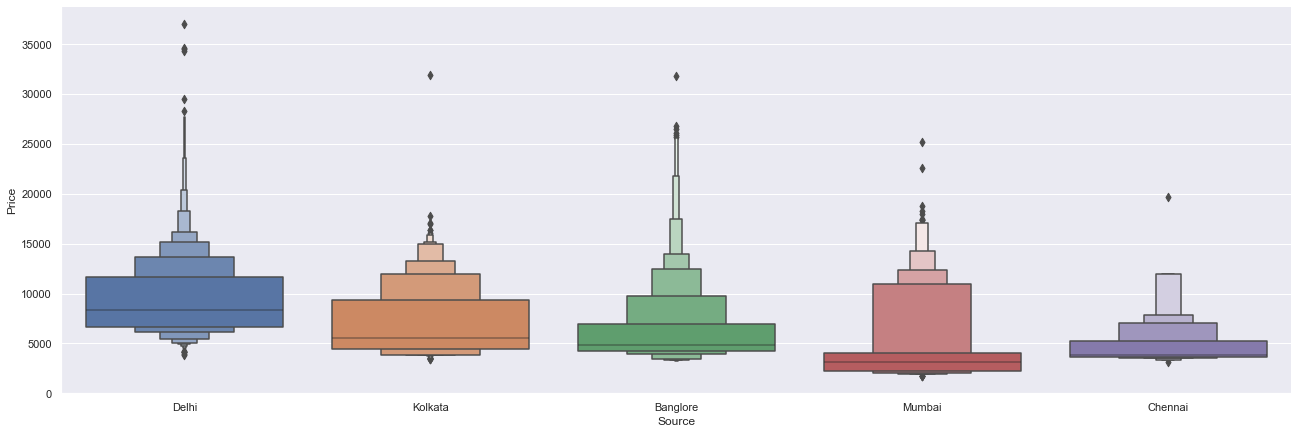

In [354]:
#Source Vs Price

sns.catplot(y = "Price", x = "Source", data = flight_data.sort_values("Price", ascending = False),kind = "boxen", height = 6, aspect = 3 )
plt.show()

In [355]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = flight_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [356]:
flight_data["Destination"].value_counts()

Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [357]:
Destination = flight_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [358]:
flight_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
                 ...          
10677                BLR → DEL
10678                CCU → BLR
10679                CCU → BLR
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 6827, dtype: object

In [359]:
#Additional_info contains almost 80% no_info
#Route And Total_stops are related to each other
flight_data.drop(["Route","Additional_Info"], axis = 1, inplace = True)

In [360]:
flight_data["Total_Stops"].value_counts()

1 stop      3086
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [361]:
#As this is case of Ordinal Categorical type we perform LabelEncoder
#Here Values are Assigned with corresponding keys

flight_data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2, "3 stops": 3, "4 stops": 4 }, inplace = True)

In [362]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25


In [363]:
#Concatenate Dataframe-----> flight_data + Airline + Source + Destination

Data_Flight = pd.concat([flight_data, Airline, Source, Destination], axis = 1)



In [364]:
Data_Flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [365]:
Data_Flight.drop(["Airline","Source","Destination"], axis = 1, inplace = True)

In [366]:
Data_Flight.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


# Test Set

In [367]:

test_Data = pd.read_excel(r"Test_set.xlsx")
pd.set_option('display.max_columns',None)
test_Data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [368]:
#Preprocessing
print("Test data Info")
print("-"*75)
print(test_Data.info())

print()
print()

print("Null values :")
print("-"*75)
test_Data.dropna(inplace = True)
print(test_Data.isnull().sum())

#EDA

#Date Of Journey
test_Data["Journey_day"] = pd.to_datetime(test_Data.Date_of_Journey, format = "%d/%m/%Y").dt.day
test_Data["Journey_month"] = pd.to_datetime(test_Data.Date_of_Journey, format = "%d/%m/%Y").dt.month
test_Data.drop(["Date_of_Journey"], axis = 1, inplace = True)

#Departure Time
test_Data["Dep_hour"] = pd.to_datetime(test_Data.Dep_Time).dt.hour
test_Data["Dep_min"] = pd.to_datetime(test_Data.Dep_Time).dt.minute
test_Data.drop(["Dep_Time"], axis = 1, inplace = True)


#Arrival Time
test_Data["Arrival_hour"] = pd.to_datetime(test_Data.Arrival_Time).dt.hour
test_Data["Arrival_min"] = pd.to_datetime(test_Data.Arrival_Time).dt.minute
test_Data.drop(["Arrival_Time"], axis = 1, inplace = True)



#Duration
               
duration = list(test_Data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
    
# Adding Duration column to test set    
test_Data["Duration_hours"] = duration_hours
test_Data["Duration_mins"] = duration_mins
test_Data.drop(["Duration"],axis = 1, inplace = True)

test_Data["Airline"].value_counts()
test_Data1 =  test_Data[(test_Data.Airline == 'Jet Airways' )]
test_Data2 =  test_Data[(test_Data.Airline == 'Jet Airways Business' )]
test_Data = test_Data.drop(test_Data1.index, axis = 0)
test_Data = test_Data.drop(test_Data2.index, axis = 0)

print("Airline")
print("-"*75)
print(test_Data["Airline"].value_counts())
Airline = pd.get_dummies(test_Data["Airline"], drop_first= True)
print()


print("Destination")
print("-"*75)
Destination = test_Data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

test_Data.drop(["Route","Additional_Info"], axis = 1, inplace = True)

#As this is case of Ordinal Categorical type we perform LabelEncoder
#Here Values are Assigned with corresponding keys

test_Data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2, "3 stops": 3, "4 stops": 4 }, inplace = True)

#Concatenate Dataframe-----> flight_data + Airline + Source + Destination

data_test = pd.concat([test_Data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline","Source","Destination"], axis = 1, inplace = True)
print()
print()

data_test.dropna(inplace = True)
print("Shape of test data : ", data_test.shape)





Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [369]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,1.0,15.0,6.0,6.0,50.0,16.0,10.0,9.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
12,1.0,15.0,5.0,9.0,0.0,19.0,15.0,10.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Feature Selection

Finding out the bets feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,
1. heatmap
2. fature-importane
3. SelectKBest

In [370]:
Data_Flight.shape

(6827, 28)

In [371]:
Data_Flight.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [391]:
x = Data_Flight.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [392]:
y = Data_Flight.iloc[:, 1]
y.head()


0     3897
1     7662
3     6218
4    13302
5     3873
Name: Price, dtype: int64

<AxesSubplot:>

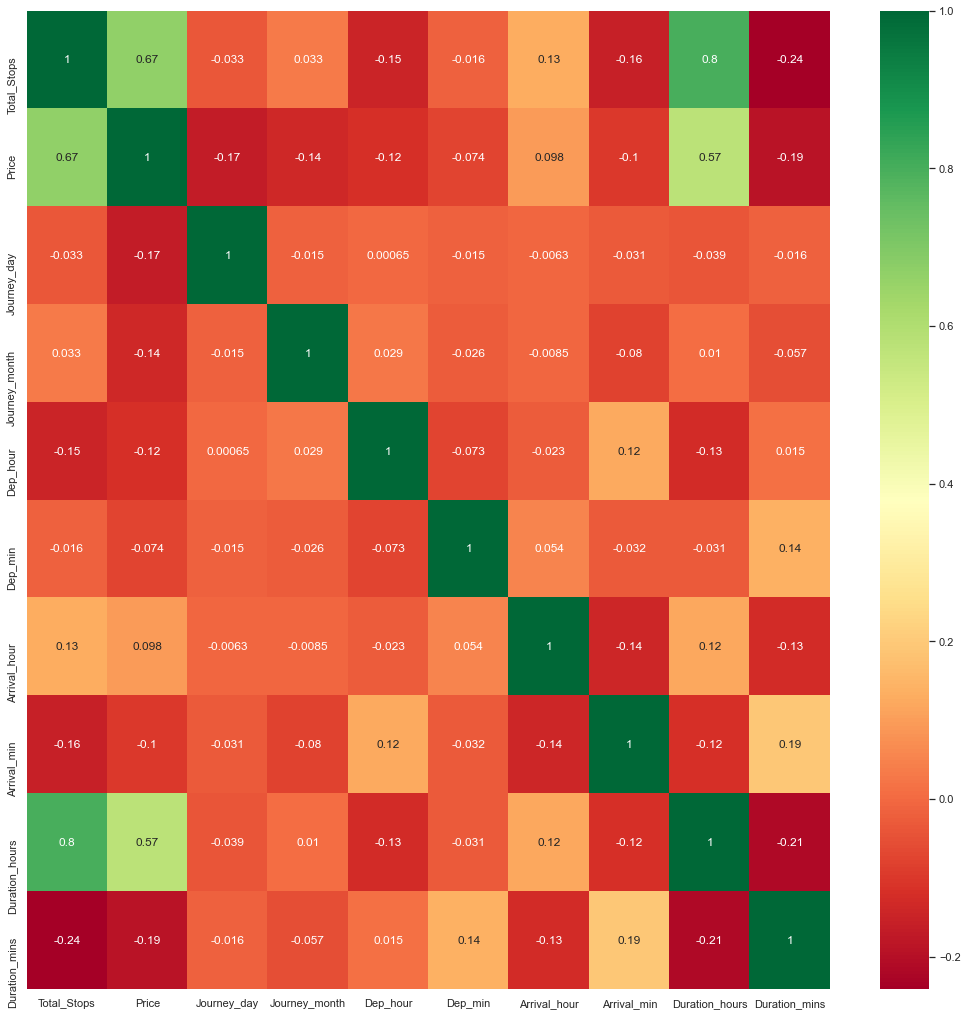

In [393]:
#Find correlation between indpendent and dependent Attributes
plt.figure(figsize = (18,18))
sns.heatmap(flight_data.corr(), annot = True, cmap = "RdYlGn")


In [394]:
#Importance feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)
print(selection.feature_importances_)

[2.57675999e-01 1.19532804e-01 7.40826308e-02 3.32409968e-02
 3.49194814e-02 3.02999508e-02 2.83645368e-02 1.71777161e-01
 2.59205340e-02 3.53462062e-02 3.52227663e-03 1.82601556e-02
 4.93262751e-02 2.09833564e-03 4.10855102e-03 1.75508438e-04
 1.32996809e-02 1.89443948e-04 1.08035982e-03 2.33350234e-02
 5.27291417e-03 3.14781581e-03 3.31569629e-02 1.85293886e-03
 4.80424825e-03 1.10637145e-03 2.41028375e-02]


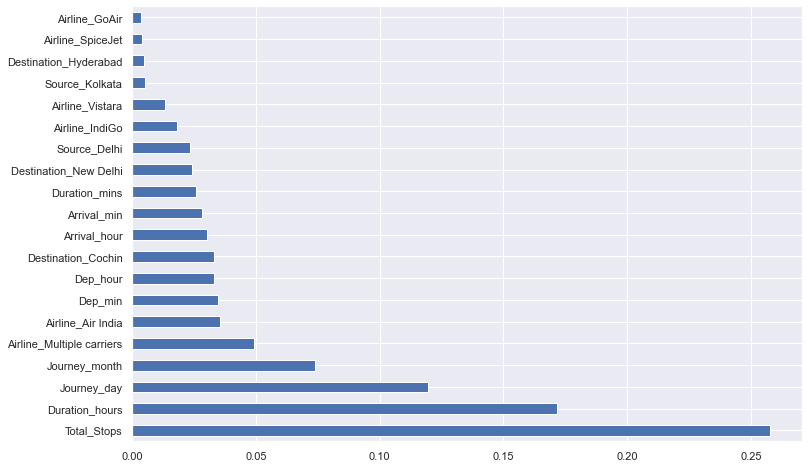

In [395]:
#plot graph of feature importance for better visualization

plt.figure(figsize = (12,8))
feat_importance = pd.Series(selection.feature_importances_, index = x.columns)
feat_importance.nlargest(20).plot(kind = 'barh')
plt.show()

# Fitting model using Random Forest

1.Fitting model using Random Forest
2.Split dataset into train and test set in order to prediction w.r.t X_test
3.If needed do scaling of data
4.Scaling is not done in Random forest
5.Import model
6.Fit the data
7.Predict w.r.t X_test
8.In regression check RSME Score
9.Plot graph

In [410]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [411]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [412]:
y_pred = reg_rf.predict(x_test)

In [413]:
reg_rf.score(x_train, y_train)

0.9724270487957332

In [414]:
reg_rf.score(x_test, y_test)

0.8210926587159847

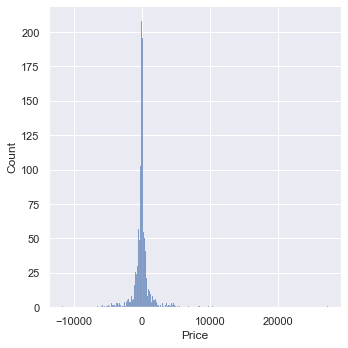

In [415]:
sns.displot(y_test-y_pred)
plt.show()

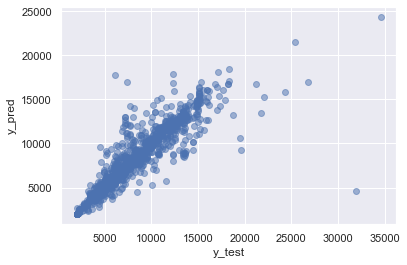

In [416]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [417]:
from sklearn import metrics

In [418]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 759.4205600472408
MSE: 2635379.2244470115
RMSE: 1623.3851127957937


In [419]:
metrics.r2_score(y_test, y_pred)

0.8210926587159847

# Hyperparameter Tuning

1.Choose following method for hyperparameter tuning
  a.RandomizedSearchCV --> Fast
  b.GridSearchCV
2.Assign hyperparameters in form of dictionery
3.Fit the model
4.Check best paramters and best score

In [420]:
from sklearn.model_selection import RandomizedSearchCV

In [421]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [422]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [423]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [424]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [425]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [426]:
prediction = rf_random.predict(x_test)

C:\Users\asd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


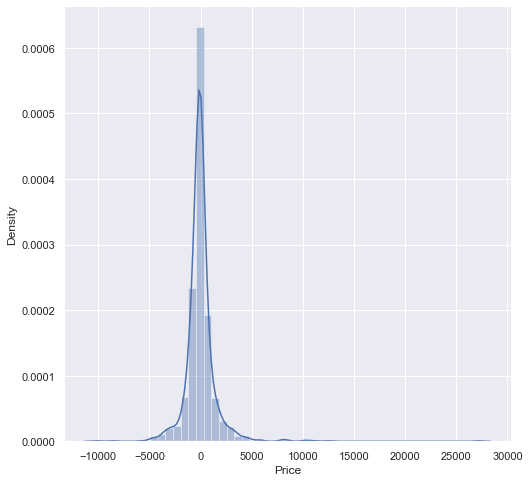

In [427]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

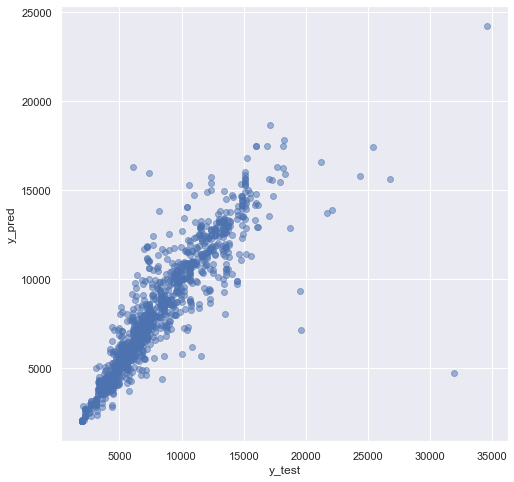

In [428]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [429]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 823.8268530942337
MSE: 2629751.423726296
RMSE: 1621.650832863319


# Save the model to reuse it again

In [437]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [438]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [439]:
y_prediction = forest.predict(x_test)

In [440]:
metrics.r2_score(y_test, y_prediction)

0.8214747118394514